# Выбор локации для скважины

## Цель и задачи

Добывающая компания «ГлавРосГосНефть». Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

**Цель:** построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой *Bootstrap.*

**Задачи:**
- Провести предобработку данных
- В избранном регионе найти месторождения, для каждого определить значения признаков;
- Построить модель и оценить объём запасов;
- Выбрать месторождения с самым высокими оценками значений.
- Расчитать риски
- Обозначить выводы


## Загрузка и подготовка данных

### Загрузка и изучение данных

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
import seaborn as sns
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#Импортируем необходимые библиотеки
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None 
#Чтобы не появлялось предупреждение SettingWithCopy при масштабировании


In [2]:
data1 = pd.read_csv('/datasets/geo_data_0.csv')
data2 = pd.read_csv('/datasets/geo_data_1.csv')
data3 = pd.read_csv('/datasets/geo_data_2.csv')
data1.info()
data2.info()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8

In [3]:
data1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
data3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
print(data1.duplicated().sum())
print(data2.duplicated().sum())
print(data3.duplicated().sum())

0
0
0


In [7]:
data1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [8]:
data2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
data3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<div class="alert alert-block alert-info">

В данной части проекта были загружены необходимые библиотеки и документы. После загрузки файлов, мы увидели что:
1. Все три файла имеют 100000 строк и 2 типа данных: `object`(столбец id) и `float` (остальные числовые данные)
2. Дубликатов и пропусков не обнаружено, значит можно готовить данные для обучения модели 
3. После вызова метода describe() выявлено, что распределение данных во втором регионе очень отличается от других. 

### Предобработка данных

In [10]:
data1 = data1.drop('id', axis=1) 
data2 = data2.drop('id', axis=1) 
data3 = data3.drop('id', axis=1) 

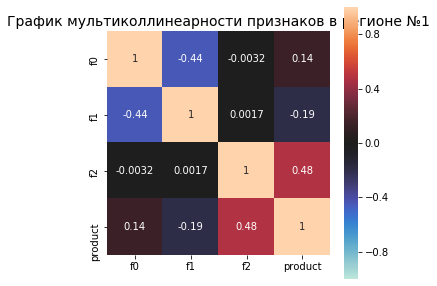

In [11]:
fig, ax = plt.subplots()
sns.heatmap(data1.corr(), vmin=-1, vmax=1, center=0, square=True, annot=True)
fig.set_figwidth(5)
fig.set_figheight(5)
plt.title('График мультиколлинеарности признаков в регионе №1', fontsize=14)
plt.show()

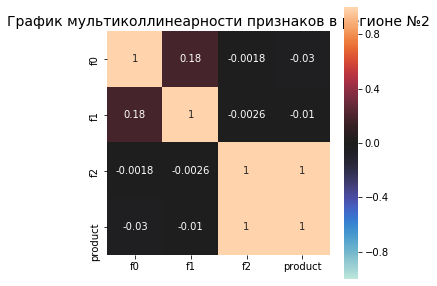

In [12]:
fig, ax = plt.subplots()
sns.heatmap(data2.corr(), vmin=-1, vmax=1, center=0, square=True, annot=True)
fig.set_figwidth(5)
fig.set_figheight(5)
plt.title('График мультиколлинеарности признаков в регионе №2', fontsize=14)
plt.show()

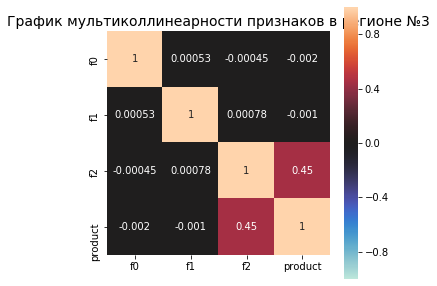

In [13]:
fig, ax = plt.subplots()
sns.heatmap(data3.corr(), vmin=-1, vmax=1, center=0, square=True, annot=True)
fig.set_figwidth(5)
fig.set_figheight(5)
plt.title('График мультиколлинеарности признаков в регионе №3', fontsize=14)
plt.show()

<div class="alert alert-block alert-info">

- Так как в следующем пункте необходимо будет стандартизировать признаки, нам нужно было удалить столбец 'id', иначе он бы служил помехой и модель выдавала бы некорректные результаты. 

- После проверки признаков на мультиколлинеарность выявили, что сильной зависимости между признаками не наблюдается (будем считать зависимость сильной, если коэффициент корреляции >0.5 или <-0.5). 

- Во втором регионе наблюдается коэффициент корреляции = 1 между признаком f2 и целевым показателем, это поможет исследованию. 

**`Следовательно, ничего не удаляем, оставляем данные в исходном виде.`**

## Обучение и проверка модели

### Регион №1

In [14]:
#Выделим признаки и целевой признак
features1 = data1.drop('product', axis=1)
target1 =  data1['product'] # Целевой признак

features1_train, features1_valid, target1_train, target1_valid = train_test_split(features1, 
                                                                                  target1, 
                                                                                  train_size=0.75, 
                                                                                  random_state=12345) 

In [15]:
numeric = ['f0', 'f1', 'f2']
scaler1 = StandardScaler()
scaler1.fit(features1_train[numeric]) 
features1_train[numeric] = scaler1.transform(features1_train[numeric])

features1_valid[numeric] = scaler1.transform(features1_valid[numeric]) 

print(features1_train)

             f0        f1        f2
27212 -0.544828  1.390264 -0.094959
7866   1.455912 -0.480422  1.209567
62041  0.260460  0.825069 -0.204865
70185 -1.837105  0.010321 -0.147634
82230 -1.299243  0.987558  1.273181
...         ...       ...       ...
4094   1.567114 -1.087243 -0.272211
85412 -1.904207 -0.525360  1.327530
2177   0.418949 -1.296788 -0.196407
77285  0.400077 -1.466874 -0.445317
86498  1.746246  0.027415  2.766848

[75000 rows x 3 columns]


In [16]:
model1 = LinearRegression()
#Обучили модель на тренировочной выборке
model1.fit(features1_train, target1_train) 
#Получили предсказания модели на валидационной выборке, сохранили в переменную
predictions1 = model1.predict(features1_valid)

result1 = mean_squared_error(target1_valid, predictions1) ** 0.5
#Посчитали значение метрики RMSE на валидационной выборке
print("RMSE модели линейной регрессии на валидационной выборке:", result1, 'тыс. баррелей')
#Средний запас прогнозируемого сырья'
mean_predicted_volume1 = predictions1.sum() / len(predictions1)
print("Средний запас прогнозируемого сырья:", mean_predicted_volume1, 'тыс. баррелей')

RMSE модели линейной регрессии на валидационной выборке: 37.5794217150813 тыс. баррелей
Средний запас прогнозируемого сырья: 92.59256778438038 тыс. баррелей


In [17]:
geo1_predict = pd.DataFrame()
geo1_predict['product_geo1'] = target1_valid
geo1_predict['predictions_geo1'] = predictions1


Text(0.5, 1.0, 'Гистограмма частот объемов запасов в скважинах региона №1 (действительные vs прогнозируемые значения)')

<Figure size 1440x720 with 0 Axes>

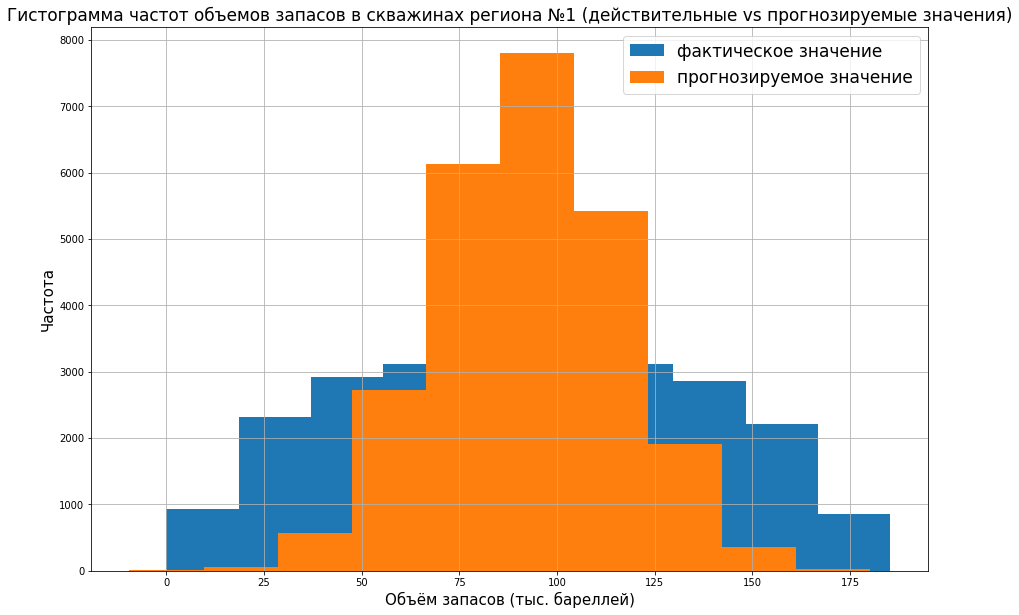

In [18]:
#Строим гистограмму частот объёмом запасов в скважинах для действительных и прогнозируемых значений
plt.figure(figsize=(20,10))
plt.figure(figsize=(15,10))
geo1_predict['product_geo1'].hist(grid=True, label='фактическое значение')
geo1_predict['predictions_geo1'].hist(grid=True, label='прогнозируемое значение')

plt.legend(fontsize=17)
plt.xlabel('Объём запасов (тыс. бареллей)',
         fontsize=15)
plt.ylabel('Частота',
         fontsize=15)
plt.title('Гистограмма частот объемов запасов в скважинах региона №1 (действительные vs прогнозируемые значения)',
         fontsize=17)


### Регион №2

In [19]:
features2 = data2.drop('product', axis=1)
target2 =  data2['product'] 

features2_train, features2_valid, target2_train, target2_valid = train_test_split(features2, 
                                                                                  target2, 
                                                                                  train_size=0.75, 
                                                                                  random_state=12345) 

scaler2 = StandardScaler()
scaler2.fit(features2_train[numeric]) 
features2_train[numeric] = scaler2.transform(features2_train[numeric])

features2_valid[numeric] = scaler2.transform(features2_valid[numeric]) 

print(features2_train)

In [20]:
model2 = LinearRegression()

model2.fit(features2_train, target2_train) 

predictions2 = model2.predict(features2_valid) 

result = mean_squared_error(target2_valid, predictions2) ** 0.5
mean_predicted_volume2 = predictions2.sum() / len(predictions2)
print("RMSE модели линейной регрессии на валидационной выборке:", result, 'тыс. баррелей')
print("Средний запас прогнозируемого сырья:", mean_predicted_volume2, 'тыс. баррелей')

RMSE модели линейной регрессии на валидационной выборке: 0.893099286775616 тыс. баррелей
Средний запас прогнозируемого сырья: 68.728546895446 тыс. баррелей


In [21]:
geo2_predict = pd.DataFrame()

geo2_predict['product_geo2'] = target2_valid
geo2_predict['predictions_geo2'] = predictions2

Text(0.5, 1.0, 'Гистограмма частот объемов запасов в скважинах региона №2 (действительные vs прогнозируемое значения)')

<Figure size 1440x720 with 0 Axes>

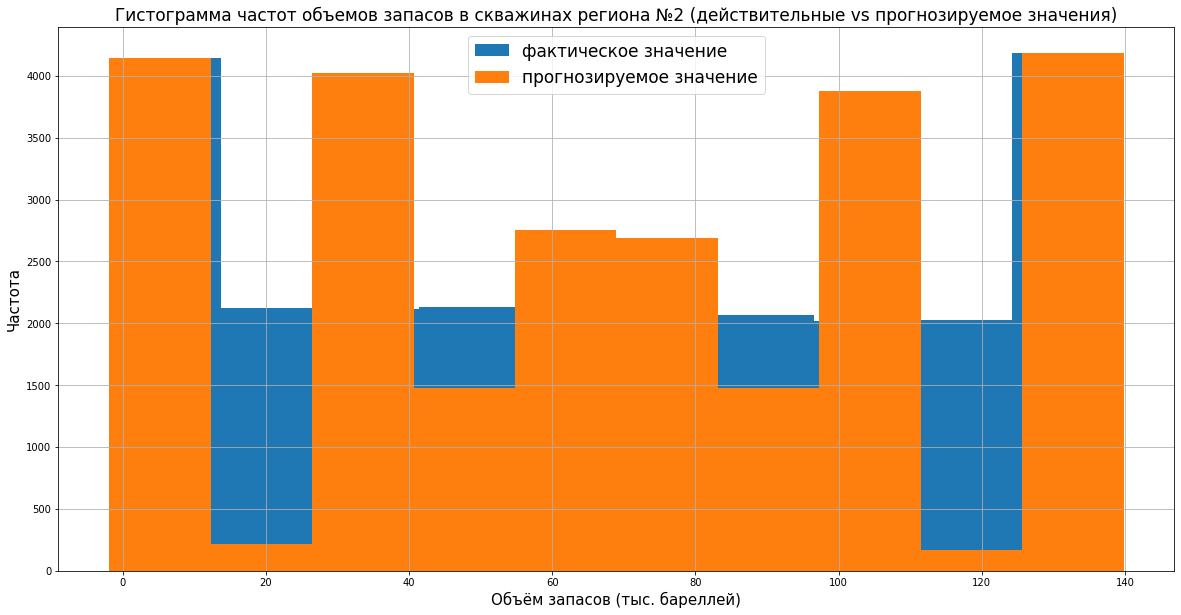

In [22]:
plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
geo2_predict['product_geo2'].hist(grid=True, label='фактическое значение')
geo2_predict['predictions_geo2'].hist(grid=True, label='прогнозируемое значение')

plt.legend(fontsize=17)
plt.xlabel('Объём запасов (тыс. бареллей)',
         fontsize=15)
plt.ylabel('Частота',
         fontsize=15)
plt.title('Гистограмма частот объемов запасов в скважинах региона №2 (действительные vs прогнозируемое значения)',
         fontsize=17)

### Регион №3

In [23]:
features3 = data3.drop('product', axis=1)
target3 =  data3['product'] 

features3_train, features3_valid, target3_train, target3_valid = train_test_split(features3, 
                                                                                  target3, 
                                                                                  train_size=0.75, 
                                                                                  random_state=12345) 

In [24]:
scaler3 = StandardScaler()
scaler3.fit(features3_train[numeric]) 
features3_train[numeric] = scaler3.transform(features3_train[numeric])

features3_valid[numeric] = scaler3.transform(features3_valid[numeric]) 

print(features3_train)

             f0        f1        f2
27212 -0.526160  0.776329 -0.400793
7866  -0.889625 -0.404070 -1.222936
62041 -1.133984  0.208576  0.296765
70185  1.227045  1.570166 -0.764556
82230 -0.194289  0.878312  0.840821
...         ...       ...       ...
4094  -1.815240  0.398261  1.821017
85412 -0.274576 -1.265211  0.245519
2177   0.368564  0.797225  0.665575
77285 -2.440690  0.113784  0.440907
86498 -1.732468  0.393573 -1.424465

[75000 rows x 3 columns]


In [25]:
model3 = LinearRegression()

model3.fit(features3_train, target3_train) 

predictions3 = model3.predict(features3_valid) 

result = mean_squared_error(target3_valid, predictions3) ** 0.5
mean_predicted_volume3 = predictions3.sum() / len(predictions3)
print("RMSE модели линейной регрессии на валидационной выборке:", result, 'тыс. баррелей')
print("Средний запас прогнозируемого сырья:", mean_predicted_volume3, 'тыс. баррелей')

RMSE модели линейной регрессии на валидационной выборке: 40.02970873393434 тыс. баррелей
Средний запас прогнозируемого сырья: 94.96504596800489 тыс. баррелей


In [26]:
geo3_predict = pd.DataFrame()
geo3_predict['product_geo3'] = target3_valid
geo3_predict['predictions_geo3'] = predictions3
geo3_predict

,product_geo3,predictions_geo3
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310
...,...,...
12581,28.492402,78.765887
18456,21.431303,95.603394
73035,125.487229,99.407281
63834,99.422903,77.779912


Text(0.5, 1.0, 'Гистограмма частот объемов запасов в скважинах региона №3 (действительные vs прогнозируемые значения)')

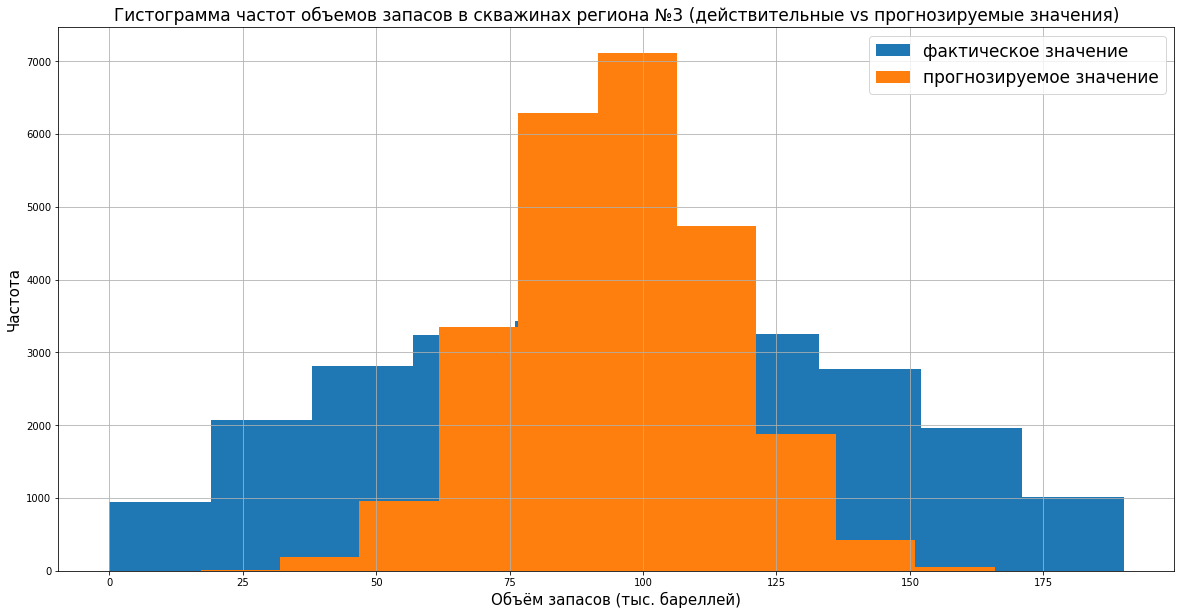

In [27]:
plt.figure(figsize=(20,10))
geo3_predict['product_geo3'].hist(grid=True, label='фактическое значение')
geo3_predict['predictions_geo3'].hist(grid=True, label='прогнозируемое значение')

plt.legend(fontsize=17)
plt.xlabel('Объём запасов (тыс. бареллей)',
         fontsize=15)
plt.ylabel('Частота',
         fontsize=15)
plt.title('Гистограмма частот объемов запасов в скважинах региона №3 (действительные vs прогнозируемые значения)',
         fontsize=17)

<div class="alert alert-block alert-info">
    
**Выводы по пункту 3:**
1. После подсчета **RMSE** («корень из средней квадратичной ошибки») увидели, что в первом и третьем регионах данные схожи. Наблюдается отклонение в 37 и 40 тыс. баррелей соответсвенно. В то время как во втором регионе этот показатель равен всего 0.89 тыс. баррелей.
2. Распределения объемов запасов первого и третьего регионов близки к нормальному, однако распределение второго региона сильно отличное от нормального. 
3. Средний запас прогнозируемого сырья первого и третьего региона также схожи и составляют 92 и 94 тыс. баррелей соответсвенно
4. У второго региона Средний запас прогнозируемого сырья равен 68 тыс. баррелей, что значительно меньше первого и второго регионов. Однако, из-за специфических данных, прогноируемые значения более точные, чем во втором и третьем регионах, так как средний разброс значений равен 0,89 тыс. баррелей

## Подготовка к расчёту прибыли

In [28]:
budget = 10**10
price_per_barrel = 450000
wells = 200
research_n = 500

In [29]:
geo1_predict['price'] = geo1_predict['product_geo1'] * price_per_barrel 
geo2_predict['price'] = geo2_predict['product_geo2'] * price_per_barrel 
geo3_predict['price'] = geo3_predict['product_geo3'] * price_per_barrel 

In [30]:
print('Точка безубыточности равна {:.0f} денежных единиц или {:.0f} тыс. баррелей нефти'\
      .format((budget/wells),(budget/(price_per_barrel*wells))))

Точка безубыточности равна 50000000 денежных единиц или 111 тыс. баррелей нефти


In [31]:
#target - фактические производительности скважи
#probabilities - прогнозируемые производительности скважи
#count - количество скважин, которые выбираем
def profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    revenue = (selected.sum() * price_per_barrel - budget) / 10**3
    return revenue

В данном пункте была найдена точна безубыточности, то есть сколько баррелей нефти необходимо производить каждой скважине, чтобы покрывать все свои затраты. Из расчета того, что мы можем выбрать только 200 скважин для разработи, получается, что из выделенных 10 млрд. на каждую скважину приходится 50млн. А исходя из цены за баррель в 450000 руб., можно рассчитать, что:

**`Каждая скважина должна производить в среднем 111 тыс. баррелей нефти для покрытия возникших затрат для её разработки`**

В данном пункте также была написана функция для расчета прибыли. Прогнозированные данные были отсортированы по убыванию. Из них сделали срез 200 скважин (столько скважин для разработки выберут в конечном итоге по условию проекта). Далее расчитали прибыль для этих 200 скважин (из выручки(количество`*`цена) вычли операционные затраты)

Далее применим данную функцию для расчета прибыли по всем регионам

## Расчёт прибыли и рисков 

In [32]:
max_profit1 = profit(target1_valid, geo1_predict['predictions_geo1'], wells)
max_profit2 = profit(target2_valid, geo2_predict['predictions_geo2'], wells)
max_profit3 = profit(target3_valid, geo3_predict['predictions_geo3'], wells)

In [33]:
print('Прибыль двухсот наиболее богатых нефтью скважин региона 1 составит {:.2f} тыс. денежных единиц'.format(max_profit1))
print('Прибыль двухсот наиболее богатых нефтью скважин региона 2 составит {:.2f} тыс. денежных единиц'.format(max_profit2))
print('Прибыль двухсот наиболее богатых нефтью скважин региона 3 составит {:.2f} тыс. денежных единиц'.format(max_profit3))

Прибыль двухсот наиболее богатых нефтью скважин региона 1 составит 3320826.04 тыс. денежных единиц
Прибыль двухсот наиболее богатых нефтью скважин региона 2 составит 2415086.70 тыс. денежных единиц
Прибыль двухсот наиболее богатых нефтью скважин региона 3 составит 2710349.96 тыс. денежных единиц


In [34]:
#target - фактические производительности скважи
#predictions - прогнозируемые производительности скважи
#well_count - количество скважин, которые выбираем
#sample_n - количество исследуемых скважин при разведке

def bootstrap(target, predictions, sample_n, well_count):
    state = np.random.RandomState(12345)

    values = []

    for i in range(1000): #Применили технику Bootstrap с 1000 выборок
        target_subsample = target.sample(n=sample_n, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample, wells))
    
    values = pd.Series(values)
    
    lower = values.quantile(0.025) 
    mean = values.mean() 
    upper = values.quantile(0.975) 
    risk = st.percentileofscore(values, 0) 
    


    print('Средняя выручка региона {:.2f} тыс. денежных единиц'.format(mean))
    print('95% доверительный интервал: ({:.2f}) - ({:.2f}) тыс. денежных единиц'.format(lower, upper))
    print('Риск убытка региона: {:.2}%'.format(risk))

In [35]:
print('Данные по региону №1')
print('')
bootstrap(target1_valid, geo1_predict['predictions_geo1'], research_n, wells)

Данные по региону №1

Средняя выручка региона 425938.53 тыс. денежных единиц
95% доверительный интервал: (-102090.09) - (947976.35) тыс. денежных единиц
Риск убытка региона: 6.0%


In [36]:
print('Данные по региону №2')
print('')
bootstrap(target2_valid, geo2_predict['predictions_geo2'], research_n, wells)

Данные по региону №2

Средняя выручка региона 515222.77 тыс. денежных единиц
95% доверительный интервал: (68873.23) - (931547.59) тыс. денежных единиц
Риск убытка региона: 1.0%


In [37]:
print('Данные по региону №3')
print('')
bootstrap(target3_valid, geo3_predict['predictions_geo3'], research_n, wells)

Данные по региону №3

Средняя выручка региона 435008.36 тыс. денежных единиц
95% доверительный интервал: (-128880.55) - (969706.95) тыс. денежных единиц
Риск убытка региона: 6.4%


## Общий вывод

<div class="alert alert-block alert-info">

**В ходе проекта были выполнены следующие действия:**
    
1. Получена общая информация о данных
2. Проведена предобработка данных
    - *удалены лишние столбцы*
    - *проведена проверка на дубликаты*
    - *данные были стандартизированы методом масштабирования*
3. Данные были поделены на две выборки (тренировочную и валидационную) в отношении **75:25**
4. Вызвана и обучена на тренировочных данных модель линейной регрессии, также были получены прогнозируемые значения для каждого из трех регионов 
5. Высчитана метрика **RMSE** для каждого региона и среднее количество запасов для региона
6. Рассмотрены распределения прогнозируемых и фактических запасов скважин каждого из регионов
7. Написана и применена функция для расчета прибыли 200 наиболее богатых скважин в каждом регионе
8. С помощью процедуры **Bootstrap** написана и применена функция для расчета границ 95% доверительного интервала, средней выручки региона и вероятности убытка


Исходя из всех вышеописанных действий, можно сделать следующий вывод: 

`Несмотря на специфичность данных, наиболее выгодным для разработки месторождений нефти является регион под номером 2.2`
- В регионе самый высокий показатель средней выручки, который составляет 515,222 млн. денежных единиц, когда в других регионах он составляет 425 и 435 млн. денежных единиц.
- В данном регионе риск убытка наименьший и составляет всего 1%, когда в остальных двух вероятность убытка равно 6 и 6,4%. 
- После расчета прибыли 200 наиболее богатых скважин в регионах видим, что во втором регионе этот показатель является наименьшим. Однако, такой показатель достигается ввиду того, что во втором регионе данные распределены более скучено и показатель RMSE равен всего 0,89 тыс. денежных единиц. То есть отклонение составляет меньше одной тясячи ден. единиц в то время как у региона №1 и №3 данный показатель 37 и 40 тыс. денежных единиц соотвественно. 

- Регион №1 и №3 исходя из полученных данных являются достаточно схожими по показателям. Однако, вторым по перспективности регион я бы выделил регион №1 ввиду того, что риск убытка составляет 6%, что меньше 6,4 в третьем регионе. Однако, в первом регионе меньше выручка на 10 млн. денежных единиц, а средний запас прогнозируемого сырья составляет 92 тыс. баррелей, а в третьем регионе 94 тыс баррелей. Но в данных регионах корень из квадратичной ошибки также высок - 37 и 40 тыс. баррелей соответственно. (а это составляет 40% и 42% от среднего запаса прогнозируемого сырья - что достаточно много)  

**`Вывод: добывающей компании «ГлавРосГосНефть» предложено бурить новую скважину в регионе №2 ввиду вышеизложенных фактов`**